In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

import sys
import os
import time
import numpy as n

from collections import OrderedDict
import time
import gc

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sigutils import *

In [3]:

def secs_to_sample(seconds): return n.int(seconds/period)

In [4]:
directory = 'recordings'
filename = ['es_pipe_', '_quaddemod_lpf_10.0lpf2_10.0']
chars = ['!','U','@', 'U@?U@?U@?']

In [5]:
recordings = {}
recordings_raw = {}
for char in chars:
#     print char
    recordings_raw[char] = n.fromfile(os.path.join(directory, filename[0] + char + filename[1]), dtype=n.float32)

In [6]:

sample_rate = 4.0032e6
period = 1.0/sample_rate


In [7]:

recordings['U'] = recordings_raw['U'][secs_to_sample(1.582):secs_to_sample(1.592)]
recordings['!'] = recordings_raw['!'][secs_to_sample(0.83361):secs_to_sample(0.84361)]
recordings['@'] = recordings_raw['@'][secs_to_sample(1.66923):secs_to_sample(1.67923)]
recordings['U@?U@?U@?'] = recordings_raw['U@?U@?U@?'][secs_to_sample(1.43455):secs_to_sample(1.452)]
# plot(recordings['U@?U@?U@?'][:20000])
# plot(recordings['U'][:20000])

(0, 30)

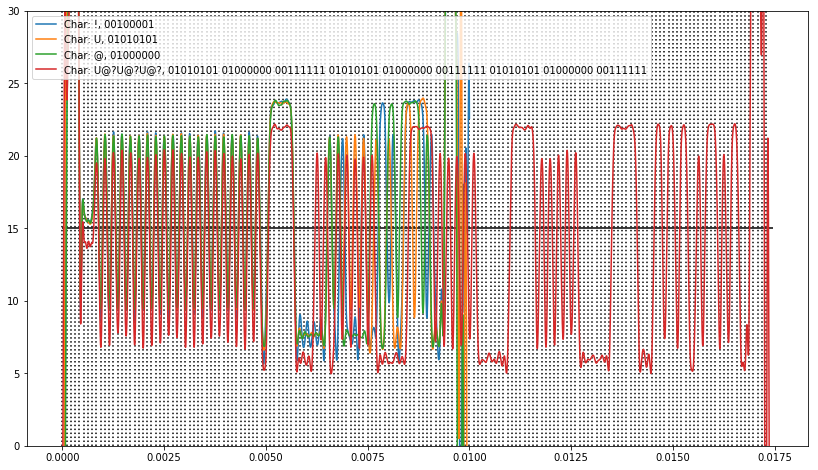

In [8]:
n_samples = recordings[chars[0]].shape[0]
sample_rate = 4.0032e6
period = 1.0/sample_rate

baudrate = 9600
baud_period = 1.0/float(baudrate)

fig = plt.figure(figsize=(14,8))

for char in chars:
    n_samples = recordings[char].shape[0]
    start = 0
    stop = n_samples
    ts = n.arange(0, period * n_samples, period)
    plot(ts[start:stop],recordings[char][start:stop], label="Char: " + str(char) + ', ' + ' '.join(['%.8d' % int(bin(ord(c))[2:]) for c in char]))
time = linspace
for i in range(int((n_samples*period)/baud_period)):
    plt.vlines(i*baud_period, 0, 100, linestyles='dotted')

level=15
plt.hlines(level, 0, n_samples*period)
plt.legend(loc='upper left')
plt.ylim(0,30)

In [9]:
bits = {}
phase_delay = 0.0
for char in chars:
    bits[char] = ''
    t = 0
    n_samples = recordings[char].shape[0]
    while t < n_samples*period:
        bits[char] += '1' if recordings[char][secs_to_sample(t)] > level else '0'
        t += baud_period

In [10]:
bits

{'!': '011111111010101010101010101010101010101010101010011111100000000100100001000110100111110100011101',
 '@': '011111111010101010101010101010101010101010101010011111100000000101000000011001101111101000011000',
 'U': '011111111010101010101010101010101010101010101010011111100000000101010101001001000110111000011111',
 'U@?U@?U@?': '011110001010101010101010101010101010101010101010011111100000101001010101010000000011111101010101010000000011111101010101010000000011111100001101101100101110101100011100'}

In [30]:
preamble = '1010101010101001111110'

In [38]:
asciis = {}
for char in chars:
    asciis[char] = [to_ascii(byte, 'bin') for byte in pack(bits[char],preamble)]

In [52]:
for char in chars:
    print repr(''.join(asciis[char]))

'\x01!\x1a}\x1d'
'\x01U$n\x1f'
'\x01@f\xfa\x18'
'\nU@?U@?U@?\r\xb2\xeb\x1c'


In [50]:
''.join(asciis['U@?U@?U@?'])

'\nU@?U@?U@?\r\xb2\xeb\x1c'

In [51]:
print repr(''.join(ascii))

'\nU@?U@?U@?\r\xb2\xeb\x1c'


In [29]:
ascii

['\n',
 'U',
 '@',
 '?',
 'U',
 '@',
 '?',
 'U',
 '@',
 '?',
 '\r',
 '\xb2',
 '\xeb',
 '\x1c']

In [82]:
sample_rate/baudrate

417.0

In [27]:
pack(bits['U@?U@?U@?'],preamble)

['00001010',
 '01010101',
 '01000000',
 '00111111',
 '01010101',
 '01000000',
 '00111111',
 '01010101',
 '01000000',
 '00111111',
 '00001101',
 '10110010',
 '11101011',
 '00011100']

In [83]:
int_bytes = n.fromfile('/home/ali/Documents/UTAT/GNURadio/2018-12-28/es_pipe_U@?U@?U@?_bits' , dtype=n.uint8)

In [84]:
bits = ''
for i in int_bytes:
    bits += bin(i)[2:]

In [91]:
bytes = pack(bits, preamble, corr_thresh=0.99)

Premable Detected at bit 9679
Preamble : 1010101010101001111110
Detected : 1010101010101001111110


In [92]:
bytes

['00101001',
 '10101010',
 '11111101',
 '10101010',
 '11111101',
 '10101010',
 '11111100',
 '11011011',
 '00101110',
 '10110011',
 '11001010',
 '11001001',
 '00110001',
 '00001100',
 '10110000',
 '00010101',
 '10000110',
 '01000101',
 '10000010',
 '01000010',
 '10000010',
 '10110001',
 '01100011',
 '00110001',
 '01011001',
 '00100100',
 '01110100',
 '01001011',
 '01000010',
 '01000010',
 '01000110',
 '01001100',
 '10100101',
 '10110001',
 '11110010',
 '11010000',
 '01000101',
 '00100001',
 '00100001',
 '01000111',
 '10001001',
 '10110010',
 '00110000',
 '11110011',
 '10100000',
 '01100100',
 '01011110',
 '11000101',
 '00100101',
 '01101000',
 '00011100',
 '10101001',
 '10000011',
 '00001001',
 '01100010',
 '11100001',
 '00100100',
 '00110000',
 '11010001',
 '00010001',
 '00110001',
 '01000101',
 '10100001',
 '00011110',
 '01001110',
 '01110111',
 '00010010',
 '01000000',
 '10001011',
 '11000010',
 '00001110',
 '01010000',
 '11000000',
 '01010100',
 '10100101',
 '01001100',
 '10010100',

In [93]:
for byte in bytes:
    if len(byte) == 8:
        print(to_ascii(byte,'bin'))

)
�
�
�
�
�
�
�
.
�
�
�
1

�

�
E
�
B
�
�
c
1
Y
$
t
K
B
B
F
L
�
�
�
�
E
!
!
G
�
�
0
�
�
d
^
�
%
h

�
�
	
b
�
$
0
�

1
E
�

N
w

@
�
�

P
�
T
�
L
�
`
p
�
�
�
$
�

%
d
J
A
�
,
E
�
�
�

�
�
'
p
"
%


�
�
�

�
�
�
F
:
�
>
�





(

/
$

2
&

�
G

Z
/
$
�
�
#
�
�
D
�
�
�
@
�

H
�

`
F


4
'
;
l
�

$
�
M

�
�
�
�
�
�
�
x
�
F



"

0
a
M
+
1
�
�
"

]
=
8
T

�
�
�
�
b


H
8
"
b
#

�
)
k
	
0
�
"
7
�
8
@
^

�
�

�
-
L

F
�
�
	

0
$
@
�
�
F

�

0
W
D
�
F
�
)
�
2

-

�
�
�

G
D

�
�
�
�
�
�
�
�

b
@
"
�
:

Z
�
`
�
}

�

�
*
Q

j
�

y

6
�


�
)

S
�
�
]

6

&

`
�
"
�
Z
�
�
�
�

�
<
Z
�
H
�
E




�
`
Q
A
	
�

�
M
�


�

�
�
)
A
,

B
�
!
�
�

$



�
0
0
�
�
�
T
�
z
�
�
�
q
�
�
q
=

�
�
�

�

�
�
a
3
�
�
�
�
$
&
�
[
	
4

0
"
h
 
%
	
k
�
�
*
�

�
�
Z
�
j
�
j
�
�
U

�
�
?

�
�
r

J
\
0
�
Y
"
R



�
`
@
`
�


�
�
C
�
�
!
	

S
@
E
�


j
 
(
�
�
�
R
�
{
�
�
�
�
D
�
2



M

�
�
�
`
�
K

�
�

�

(

�
Q
�

U
*
Q
@
�

�

In [89]:
hex(9679)

'0x25cf'